## Generating synthetic data using an ODE model

This notebook shows how to generate training data for a surrogate model, using an ODE model.
Parameter ranges are specified and explored using Sobol sequences.


In [7]:
import sys
import numpy as np
import pandas as pd

sys.path.append("../")
from vpop_calibration.model.ode import OdeModel
from vpop_calibration.data_generation import simulate_dataset_from_ranges

from IPython.display import display

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Define the ode model
def equations(t, y, k_12, k_21, k_el):
    ydot = [  # y[0] is A1, y[1] is A2
        k_21 * y[1] - k_12 * y[0] - k_el * y[0],
        k_12 * y[0] - k_21 * y[1],
    ]
    return ydot


variable_names = ["A0", "A1"]
parameter_names = ["k_12", "k_21", "k_el"]

pk_two_compartments_model = OdeModel(equations, variable_names, parameter_names)

In [ ]:
nb_timesteps = 15
tmax = 24.0
initial_conditions = np.array([10.0, 0.0])
time_steps = np.linspace(0.0, tmax, nb_timesteps)

log_nb_patients = 5
param_ranges = {
    "k_12": {"low": 0.02, "high": 0.07, "log": False},
    "k_21": {"low": 0.1, "high": 0.3, "log": False},
}

protocol_design = pd.DataFrame({"protocol_arm": ["A", "B"], "k_el": [0.1, 0.5]})

In [10]:
dataset = simulate_dataset_from_ranges(
    pk_two_compartments_model,
    log_nb_patients,
    param_ranges,
    initial_conditions,
    protocol_design,
    np.array([0.05, 0.0002]),
    "additive",
    time_steps,
)

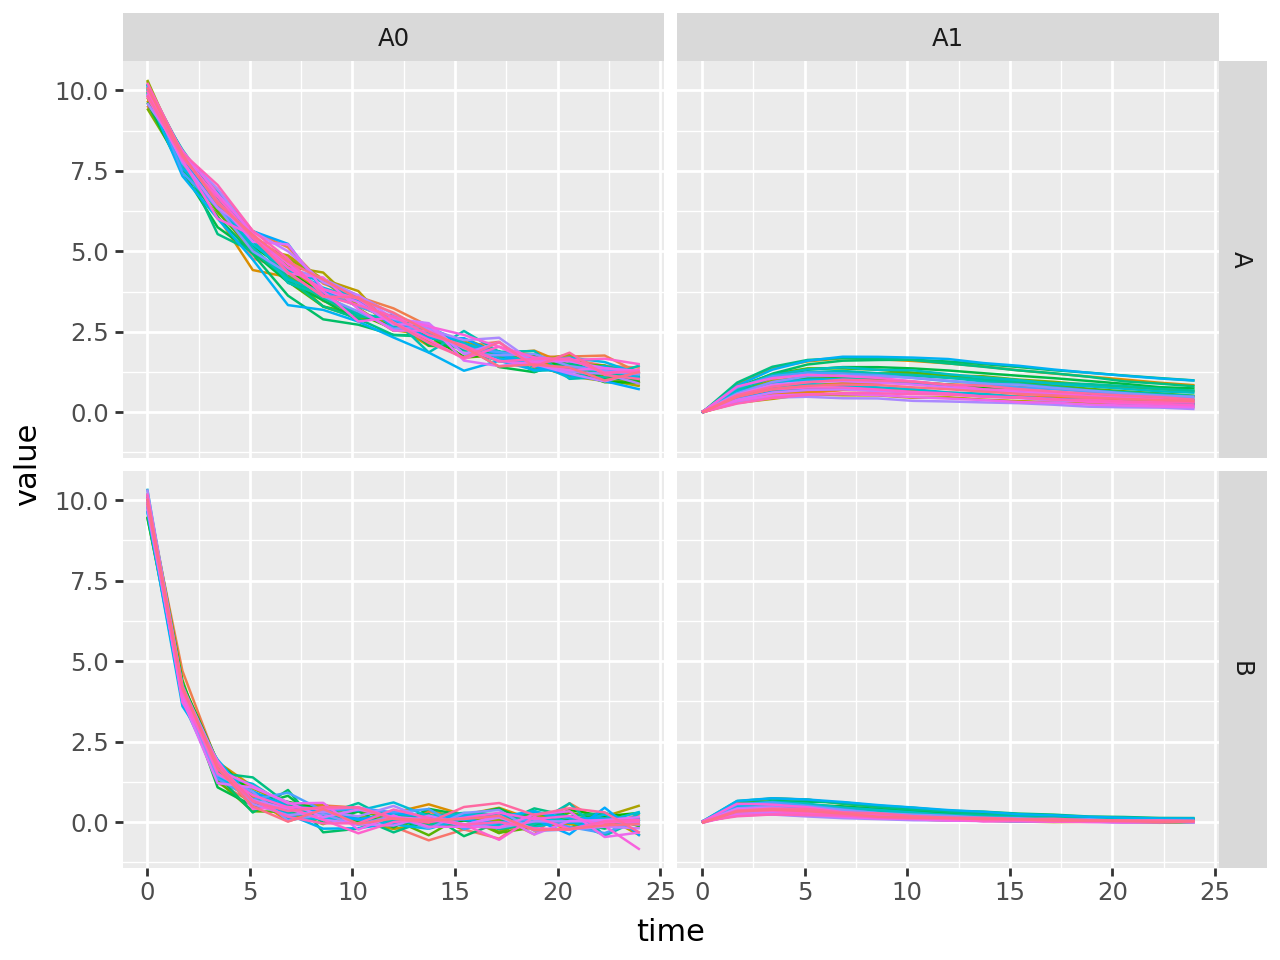

In [11]:
from plotnine import *

p1 = (
    ggplot(dataset, aes(x="time", y="value", color="id"))
    + geom_line()
    + facet_grid(rows="protocol_arm", cols="output_name")
    + theme(legend_position="none")
)

p1.show()